importing needed packages


In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.metrics import r2_score

reading data in 

In [2]:
df_name = "dataset.csv"
df = pd.read_csv(df_name)
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


lets select some features to explore more

In [3]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


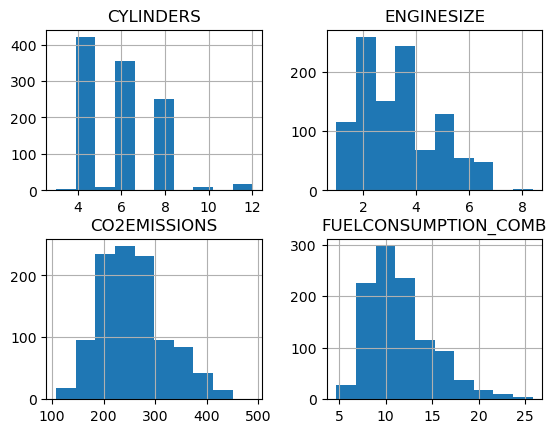

In [4]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

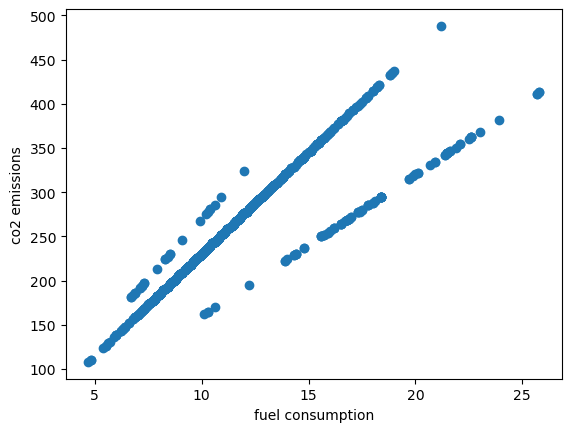

In [5]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS)
plt.xlabel("fuel consumption")
plt.ylabel("co2 emissions")
plt.show()

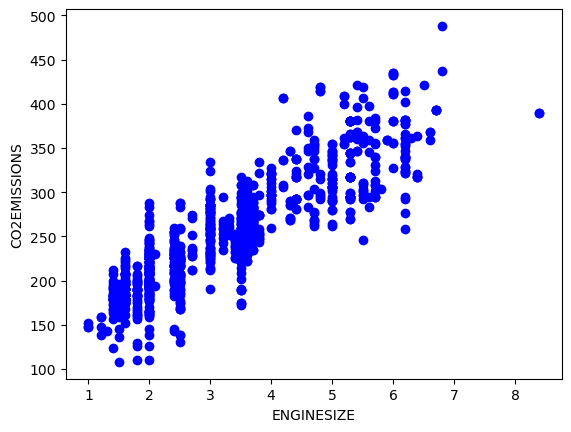

In [6]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color="blue",)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

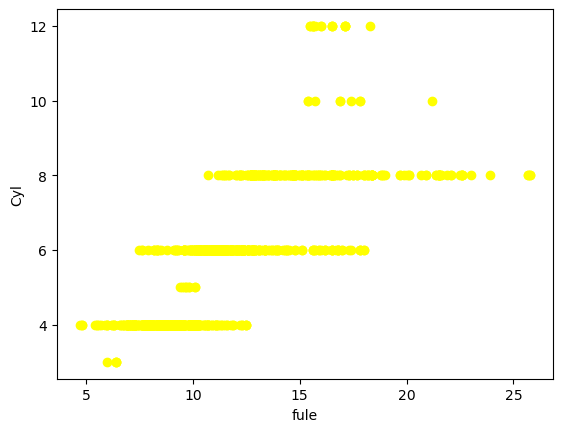

In [7]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CYLINDERS, color="yellow")
plt.xlabel("fule")
plt.ylabel("Cyl")
plt.show()

In [8]:
X = df.drop("CO2EMISSIONS", axis=1).values
y = df['CO2EMISSIONS'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26)

In [10]:
def fit_model(model_name) -> float:
    regr = model_name()
    name_of_model = regr.__class__.__name__
    regr.fit(X_train, y_train)
    print(name_of_model," Is fitting")
    preds = regr.predict(X_test)
    r2 = r2_score(preds, y_test)
    print(f"R2 score of {name_of_model} --> {r2}")
    return r2
    
fit_model(SVR)

SVR  Is fitting
R2 score of SVR --> 0.7896968811508006


0.7896968811508006

In [15]:
list_of_prepared_models = [linear_model.LinearRegression, ensemble.AdaBoostRegressor, ensemble.GradientBoostingRegressor, SVR]
list_of_scores = {
    "name": [],
    "r2": []
}

for model in list_of_prepared_models:
    r2 = fit_model(model)
    list_of_scores["r2"].append(r2)
    name = model().__class__.__name__
    list_of_scores['name'].append(name)
    print()

LinearRegression  Is fitting
R2 score of LinearRegression --> 0.8473149753751933

AdaBoostRegressor  Is fitting
R2 score of AdaBoostRegressor --> 0.9013927173495233

GradientBoostingRegressor  Is fitting
R2 score of GradientBoostingRegressor --> 0.9593152456737678

SVR  Is fitting
R2 score of SVR --> 0.7896968811508006



In [16]:
print(list_of_scores)

{'name': ['LinearRegression', 'AdaBoostRegressor', 'GradientBoostingRegressor', 'SVR'], 'r2': [0.8473149753751933, 0.9013927173495233, 0.9593152456737678, 0.7896968811508006]}
